In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx")
data

,Player,Nation,Pos,Squad,Age,Tkl,TklW,Blocks,Sh,Pass,Err,MP,Gls,Ast,CrdY,CrdR,short Cmp%,medium Cmp%,long Cmp%,KP,Fls,Crs,OG,AerWon,AerLost,CrdY + CrdR,AerTot
0,Paulo Azzi,br BRA,DEF,Cagliari,29.0,19,11,11,2,9,0,25,0,0,1,0,81.0,65.7,32.2,9,5,48,0,13,11,1,24
1,Davide Bartesaghi,it ITA,DEF,Milan,17.0,2,0,1,1,0,0,6,0,0,0,0,90.9,93.8,50.0,0,1,0,0,3,0,0,3
2,Dylan Bronn,tn TUN,DEF,Salernitana,28.0,0,0,2,0,2,0,4,0,0,0,0,83.3,75.0,0.0,0,0,0,0,4,4,0,8
3,Patrick Ciurria,it ITA,DEF,Monza,28.0,30,18,20,5,15,0,22,0,1,2,0,88.9,77.9,56.9,30,29,53,0,7,9,2,16
4,Alessandro Di Pardo,it ITA,DEF,Cagliari,24.0,4,1,9,2,7,0,15,0,0,0,0,79.3,71.9,25.0,5,3,18,0,4,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Davide Zappacosta,it ITA,DEF,Atalanta,31.0,30,20,29,4,25,0,31,2,1,5,0,91.3,84.5,64.9,17,26,76,0,9,13,5,22
213,Jordan Zemura,zw ZIM,DEF,Udinese,23.0,24,16,5,1,4,0,27,1,0,1,0,86.5,63.3,33.3,8,15,21,0,9,10,1,19
214,David Zima,cz CZE,DEF,Torino,22.0,1,1,0,0,0,0,5,0,0,0,0,90.9,88.5,40.0,0,0,0,0,2,5,0,7
215,Nadir Zortea,it ITA,DEF,Atalanta,24.0,5,4,2,0,2,0,14,1,5,3,0,86.0,74.6,50.0,21,15,74,0,11,21,3,32


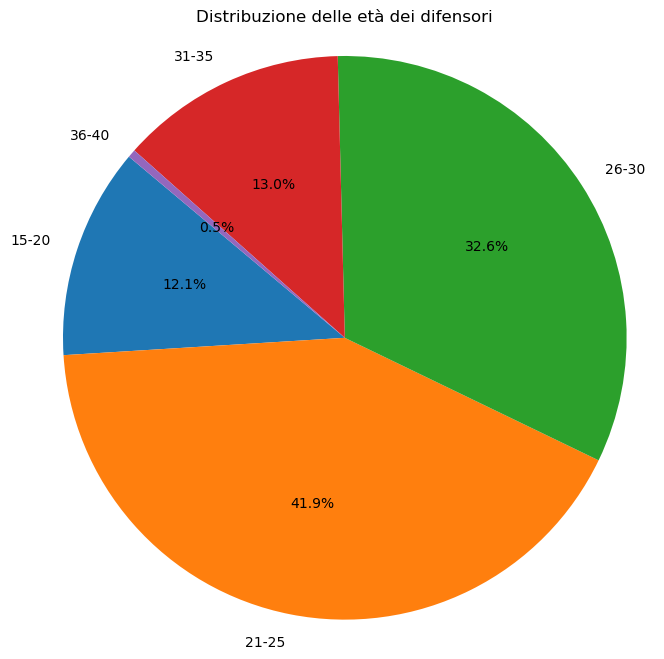

In [24]:
#diagramma a torta

eta = data['Age']

# Definisci le fasce di età
bins = [15, 20, 25, 30, 35, 40]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40']

# Categorizza le età nelle fasce specificate
eta_bins = pd.cut(eta, bins=bins, labels=labels, right=True, include_lowest=True)

# Conta il numero di difensori in ciascuna fascia
eta_counts = eta_bins.value_counts().sort_index()

# Crea il diagramma a torta
plt.figure(figsize=(8, 8))
plt.pie(eta_counts, labels=eta_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione delle età dei difensori')
plt.axis('equal')  # Per rendere il diagramma a torta circolare
# Mostra il diagramma a torta
plt.show()


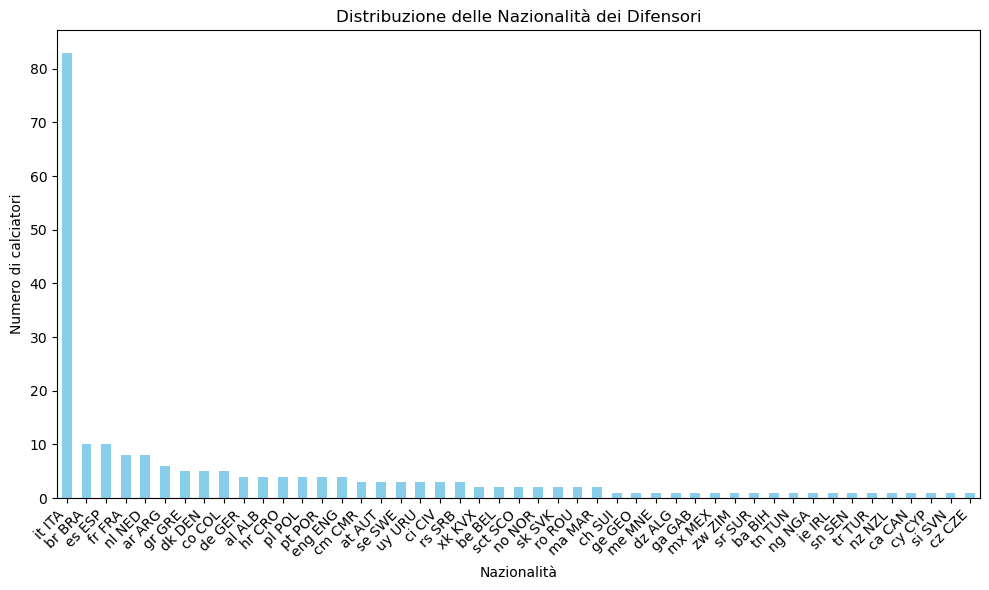

In [18]:
#istogramma nazionalità
nazionalita = data['Nation']

# Conta il numero di calciatori per ciascuna nazionalità
nazionalita_counts = nazionalita.value_counts()

# Crea l'istogramma
fig, ax = plt.subplots(figsize=(10, 6))
nazionalita_counts.plot(kind='bar', ax=ax, color='skyblue')

# Aggiungi i titoli e le etichette
ax.set_title('Distribuzione delle Nazionalità dei Difensori')
ax.set_xlabel('Nazionalità')
ax.set_ylabel('Numero di calciatori')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')

# Mostra il grafico
plt.tight_layout()
plt.show()

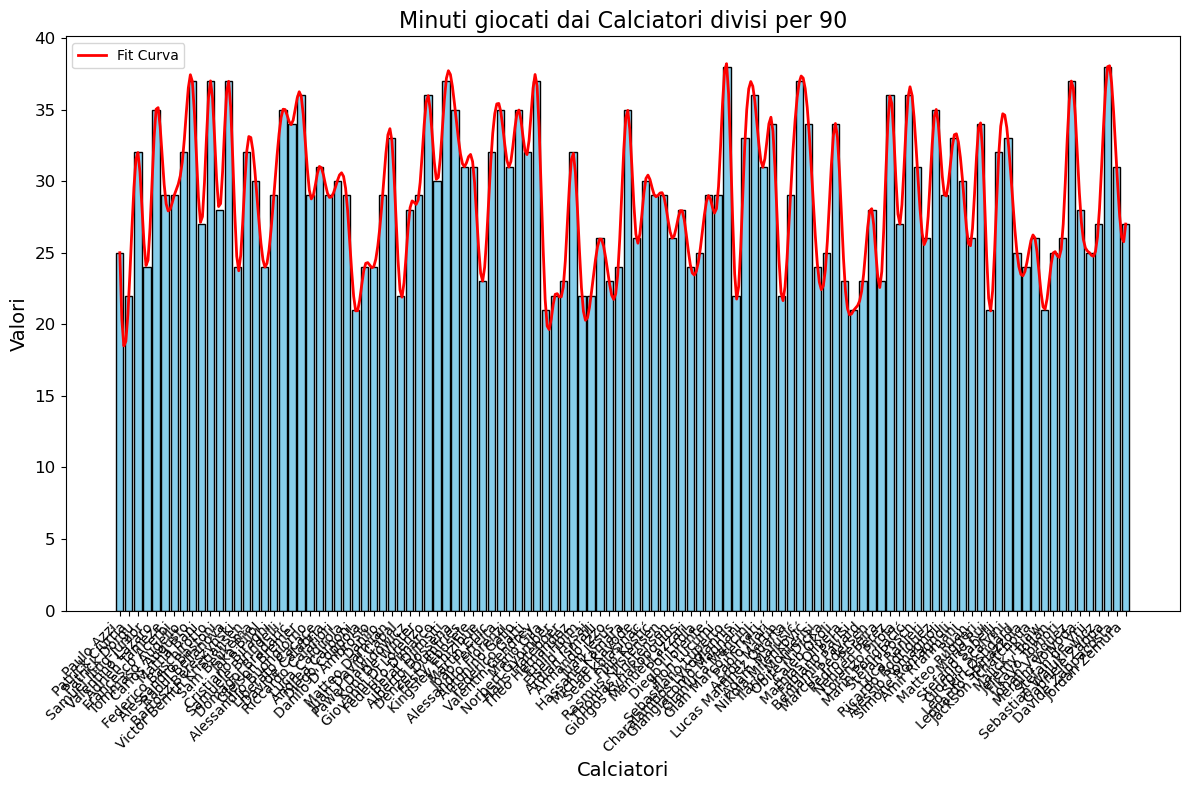

La media risulta: 29.035714285714285


In [19]:
import numpy as np
from scipy.interpolate import make_interp_spline

# Estrai i dati rilevanti
calciatori = data['Player']  
valori = data['MP']    

#Considero calciatori con più di 20 apparizioni
filtrato = valori > 20
calciatori_filtrati = calciatori[filtrato]
valori_filtrati = valori[filtrato]

# Crea un istogramma
plt.figure(figsize=(12, 8))
plt.bar(calciatori_filtrati, valori_filtrati, color='skyblue', edgecolor='black')

# Ottimizza il layout
plt.xlabel('Calciatori', fontsize=14)
plt.ylabel('Valori', fontsize=14)
plt.title('Minuti giocati dai Calciatori divisi per 90', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

# Aggiungi una curva di fit
x = np.arange(len(calciatori_filtrati))  # Converti l'indice dei calciatori filtrati in numerico
spl = make_interp_spline(x, valori_filtrati, k=3)  # Fit con spline
x_smooth = np.linspace(x.min(), x.max(), 500)  # Genera un range di valori lisciato
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Fit Curva')

plt.tight_layout()
plt.legend()
plt.show()

media_valori_filtrati = valori_filtrati.mean()

# Mostra il risultato
print("La media risulta:", media_valori_filtrati)

In [20]:
import numpy as np

def calculate_bins(data):
    n = len(data)
    sigma = np.std(data)
    IQR = np.percentile(data, 75) - np.percentile(data, 25)
    
    # Regola di Freedman-Diaconis
    bin_width_fd = 2 * IQR / (n ** (1/3))
    num_bin_fd = int(np.ceil((data.max() - data.min()) / bin_width_fd))
    
    return num_bin_fd

In [21]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_histogram(data, label, xlabel, ylabel, title):
    # Filtra i valori non finiti (inf, -inf) e rimuovi NaN
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Calcola il numero di bin
    num_bins = calculate_bins(data)
    
    # Crea un istogramma dei dati
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(data, bins=num_bins, alpha=0.7, color='blue', edgecolor='black', label=label)
    
    # Funzione di fit (es. Gaussiana)
    def gauss(x, a, x0, sigma):
        return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
    
    # Calcola il centro dei bins per il fit
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Parametri iniziali per il fit gaussiano
    p0 = [max(counts), data.mean(), data.std()]
    
    # Fit dei dati con la funzione gaussiana
    try:
        popt, _ = curve_fit(gauss, bin_centers, counts, p0=p0, maxfev=2000)
        print("Parametri ottimali del fit:", popt)  # Stampa i parametri ottimali del fit
        # Sovrapposizione del fit sull'istogramma solo se il fit ha successo
        x_fit = np.linspace(bins[0], bins[-1], 100)
        y_fit = gauss(x_fit, *popt)
        plt.plot(x_fit, y_fit, color='red', label='Fit Gaussiano')
    except RuntimeError as e:
        print(f"Errore durante il fitting: {e}")
    
    # Personalizzazione del grafico
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Mostra il grafico
    plt.show()
    
    # Calcola e mostra la media dei dati
    media_valori = data.mean()
    print(f"La media risulta: {media_valori}")

In [22]:
def calcola_tackle(data):
    rapporti = data['TklW'] / data['Tkl']
    plot_histogram(rapporti, 'Tackles', 'Tackles riusciti', 'Numero di calciatori', 'Istogramma dei Tackles riusciti')

def calcola_intercettazioni(data):
    intercettazioni = data['Blocks']
    plot_histogram(intercettazioni, 'Intercettazioni', 'Intercettazioni', 'Numero di calciatori', 'Istogramma delle intercettazioni')

def calcola_passaggi(data):
    rapporti = (data['short Cmp%'] + data['medium Cmp%'] + data['long Cmp%']) / 3
    plot_histogram(rapporti, 'Precisione passaggi', 'Passaggi riusciti %', 'Numero di calciatori', 'Istogramma dei passaggi riusciti')

def calcola_gol(data):
    gol = data['Gls']
    plot_histogram(gol, 'Gol', 'Gol', 'Numero di calciatori', 'Istogramma dei gol')

def calcola_assist(data):
    presenze = data['MP']
    ast = data['Ast']
    # Filtra i dati dove 'MP' è maggiore o uguale a 5
    filtrati = data[presenze >= 5]
    ast = filtrati['Ast']
    plot_histogram(ast, 'Assist', 'Assist', 'Numero di calciatori', 'Istogramma degli assist')

def calcola_cartellini(data):
    cart = data['CrdY'] + data['CrdR']
    plot_histogram(cart, 'Cartellini', 'Cartellini', 'Numero di calciatori', 'Istogramma dei cartellini')

def calcola_key_passes(data):
    presenze = data['MP']
    kp = data['KP']
    # Filtra i dati dove 'MP' è maggiore o uguale a 5
    filtrati = data[presenze >= 5]
    kp = filtrati['KP']
    plot_histogram(kp, 'Key passes', 'Key passes', 'Numero di calciatori', 'Istogramma dei Key passes')

def calcola_duelli_aerei(data):
    Aerw = data['AerWon']
    Aertot = data['AerTot']
    # Calcola il rapporto per ogni calciatore
    rapporti = Aerw / Aertot
    plot_histogram(rapporti, 'Duelli aerei vinti', 'Duelli aerei vinti', 'Numero di calciatori', 'Istogramma dei duelli aerei vinti')

Parametri ottimali del fit: [33.28130392  0.61321678  0.10651926]


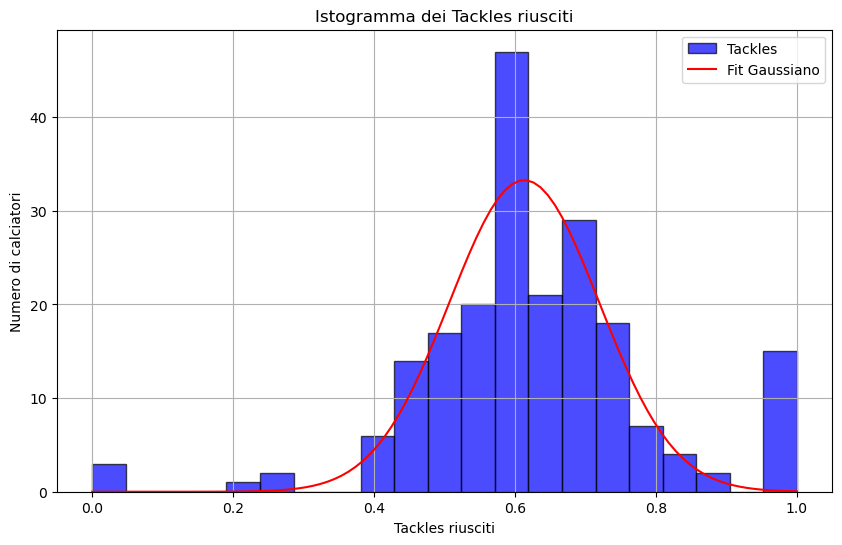

La media risulta: 0.6248235594003889
Parametri ottimali del fit: [40.30794093  4.35655912 22.46449001]


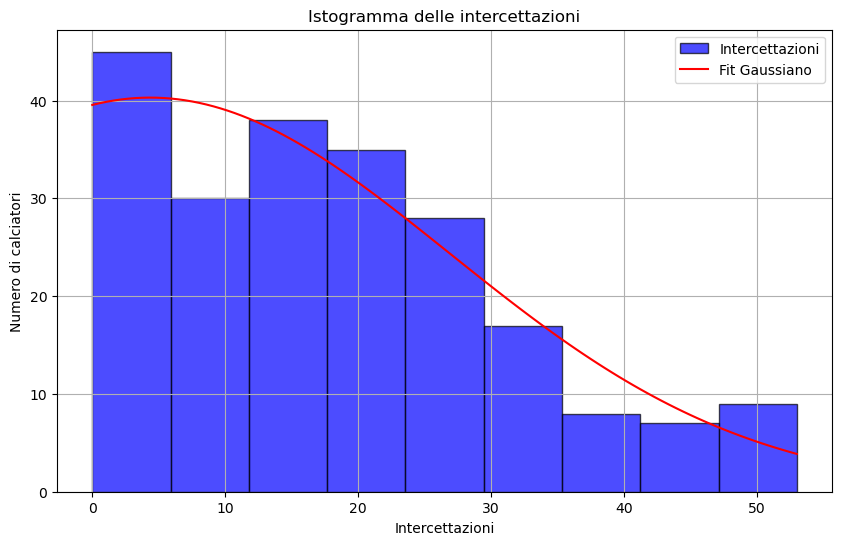

La media risulta: 18.35483870967742
Parametri ottimali del fit: [35.73456568 76.69326162  6.68057378]


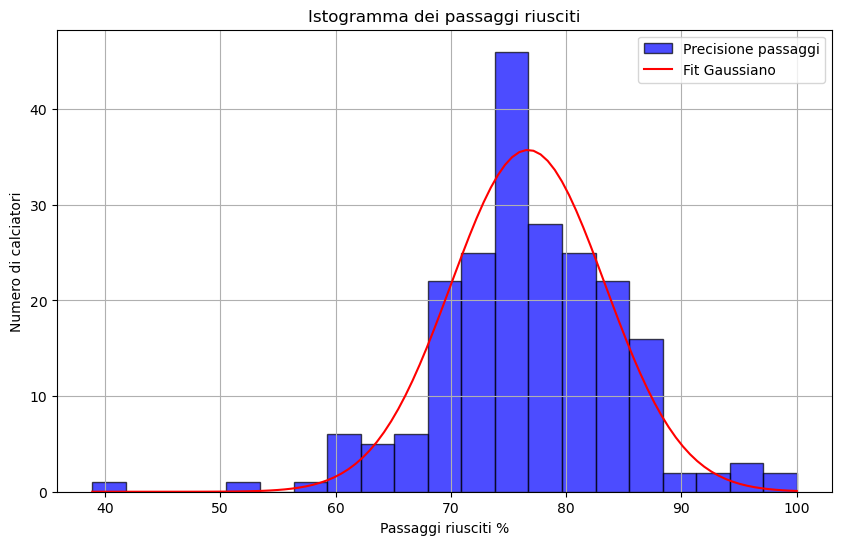

La media risulta: 76.72769953051645
Parametri ottimali del fit: [3.06646029e+02 4.08971139e-02 9.00523496e-02]


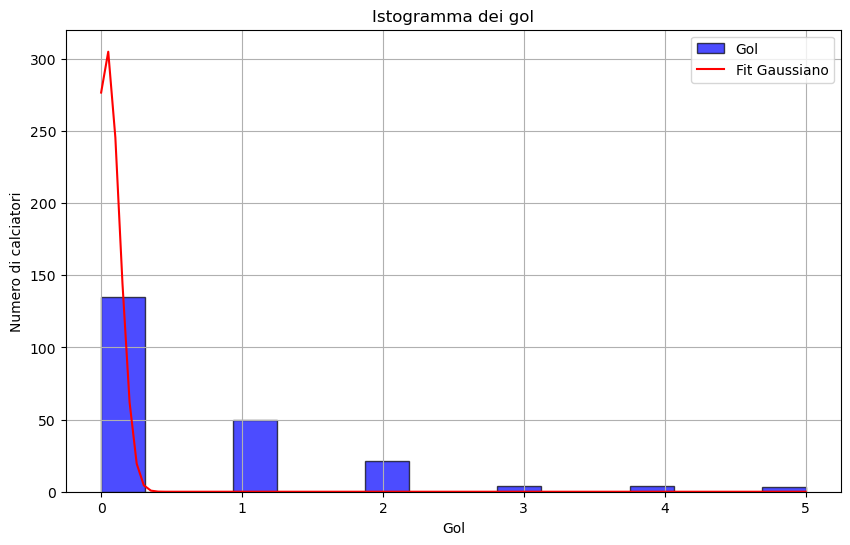

La media risulta: 0.6221198156682027
Parametri ottimali del fit: [ 4.96199718e+02 -3.74874319e-02  1.10844648e-01]


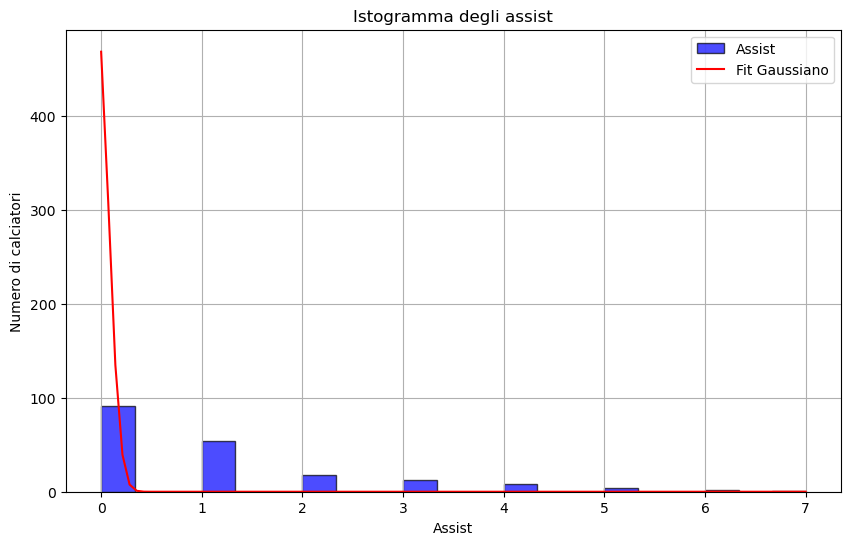

La media risulta: 1.0471204188481675
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


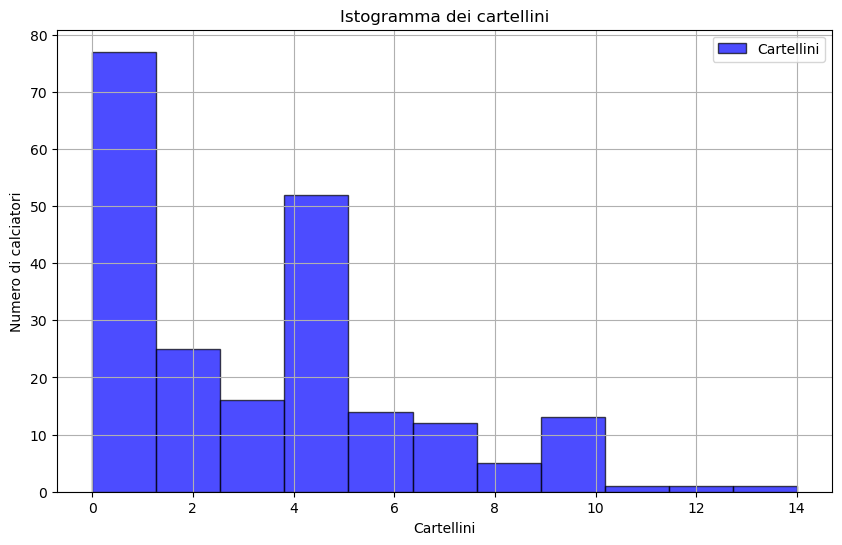

La media risulta: 3.3548387096774195
Errore durante il fitting: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.


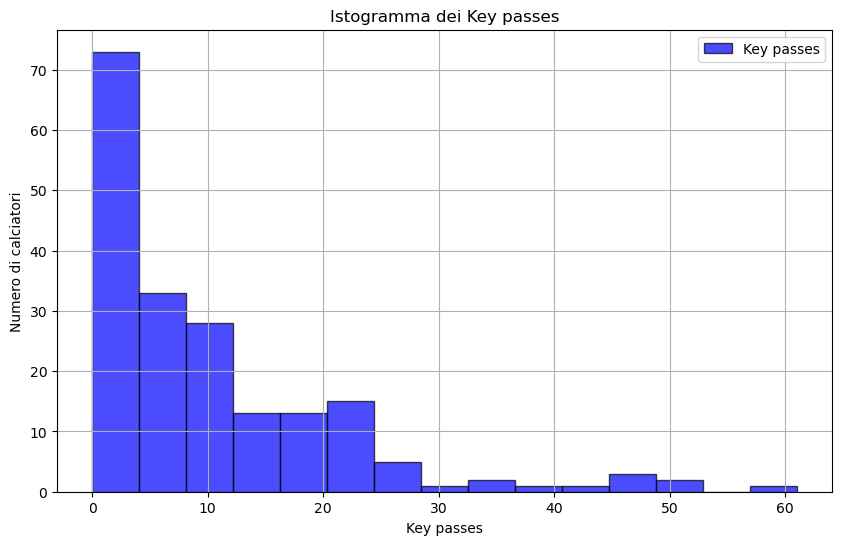

La media risulta: 10.649214659685864
Parametri ottimali del fit: [37.26491956  0.55251612  0.11053252]


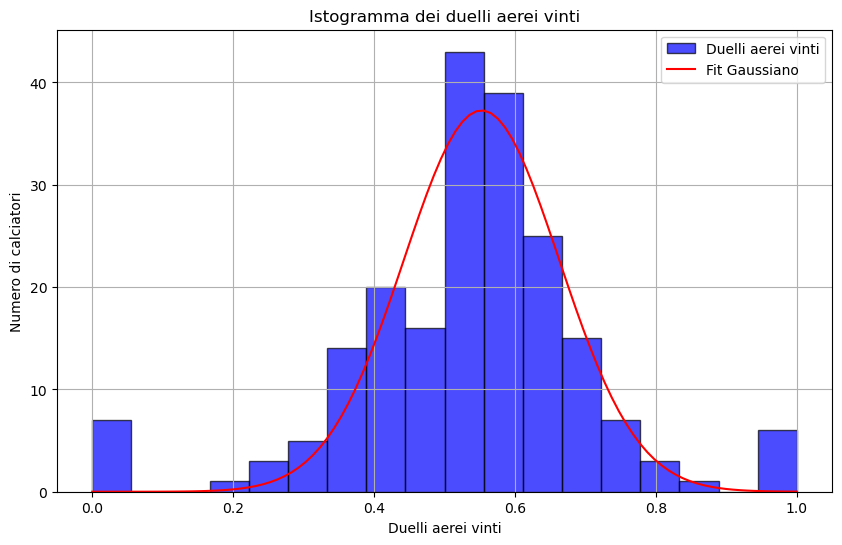

La media risulta: 0.5319547161985876


In [23]:
import pandas as pd

# Carica i dati
data = pd.read_excel(r"C:\Users\milan\OneDrive\Documenti\difensori_2023.xlsx")

# Calcola e visualizza i grafici
calcola_tackle(data)
calcola_intercettazioni(data)
calcola_passaggi(data)
calcola_gol(data)
calcola_assist(data)
calcola_cartellini(data)
calcola_key_passes(data)
calcola_duelli_aerei(data)